# Plotting Global Warming Trends in EU Countries

In [1]:
!wget https://opendata.arcgis.com/datasets/4063314923d74187be9596f10d034914_0.csv -O /tmp/global_warming.csv

--2023-10-30 09:34:34--  https://opendata.arcgis.com/datasets/4063314923d74187be9596f10d034914_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 44.215.202.167, 23.23.51.121, 54.197.243.216
Connecting to opendata.arcgis.com (opendata.arcgis.com)|44.215.202.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘/tmp/global_warming.csv’

/tmp/global_warming     [ <=>                ] 184.93K  --.-KB/s    in 0.1s    

2023-10-30 09:34:35 (1.29 MB/s) - ‘/tmp/global_warming.csv’ saved [189366]



In [2]:
!pip install pandas seaborn  

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/tmp/global_warming.csv')

# Display the first few rows of the DataFrame
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [4]:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark',
'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain',
'Sweden']

# Filter the DataFrame
df_eu = df[df['Country'].isin(eu_countries)]

# Display the first few rows of the filtered DataFrame
df_eu.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
12,13,Austria,AT,AUT,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.098,2.409,2.167,2.096,1.741,2.524,2.370,2.315,1.395,2.498
19,20,Belgium,BE,BEL,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.463,2.417,1.371,1.882,1.731,2.196,2.081,2.572,1.203,2.807
29,30,Bulgaria,BG,BGR,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.476,1.196,1.438,1.899,0.954,2.192,2.112,2.037,1.629,1.831
53,54,Denmark,DK,DNK,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.397,2.677,1.516,1.852,1.619,2.109,2.180,2.633,1.690,2.219
68,69,Finland,FI,FIN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.424,2.591,2.613,2.151,1.487,2.157,1.452,3.317,1.938,2.062


In [6]:
df_eu_pivot = df_eu.melt(id_vars=['Country'], value_vars=[f'F{year}' for year in range(1961, 2023)], var_name='Year', value_name='Anomaly')

# Convert the 'Year' column to integer
df_eu_pivot['Year'] = df_eu_pivot['Year'].str[1:].astype(int)

# Pivot the DataFrame
df_eu_pivot = df_eu_pivot.pivot(index='Country', columns='Year', values='Anomaly')

# Display the pivoted DataFrame
df_eu_pivot.head()

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Austria,1.031,-0.621,-0.727,-0.371,-0.883,0.602,0.676,0.211,-0.126,-0.550,...,1.098,2.409,2.167,2.096,1.741,2.524,2.370,2.315,1.395,2.498
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.463,2.417,1.371,1.882,1.731,2.196,2.081,2.572,1.203,2.807
Bulgaria,0.903,0.488,-0.248,-0.528,-0.456,1.151,0.027,0.421,-0.485,0.205,...,1.476,1.196,1.438,1.899,0.954,2.192,2.112,2.037,1.629,1.831
Denmark,1.117,-0.641,-1.019,-0.274,-0.603,-0.500,0.831,0.277,-0.135,-1.204,...,0.397,2.677,1.516,1.852,1.619,2.109,2.180,2.633,1.690,2.219
Finland,1.892,-0.339,-0.401,0.338,-0.263,-1.801,1.088,-1.634,-0.478,-0.629,...,1.424,2.591,2.613,2.151,1.487,2.157,1.452,3.317,1.938,2.062


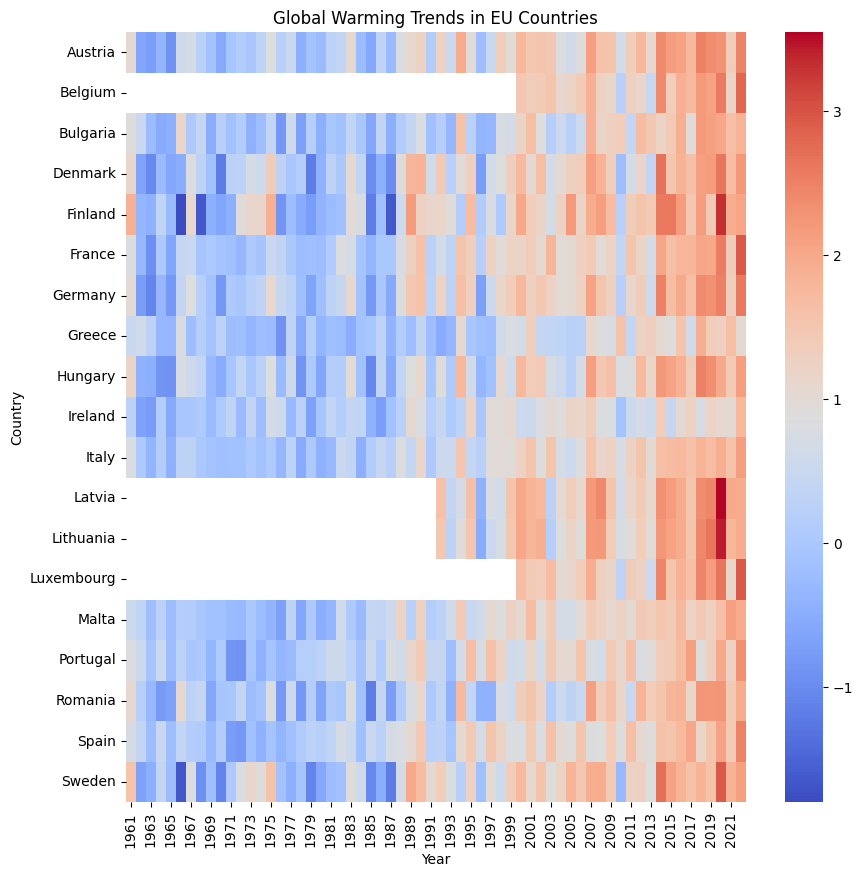

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heatmap
sns.heatmap(df_eu_pivot, cmap='coolwarm', ax=ax)

# Set the title
ax.set_title('Global Warming Trends in EU Countries')

# Show the plot
plt.show()